# Data generator for a mixture of Gaussian peaks + linear baseline

\begin{equation}
\Large y_n = f(x_n) = \sum\limits_{m=1}^M [A_m \cdot e^{-\frac{(x_n-\mu_m)^2}{2\cdot\sigma_m^2}}] + \alpha\cdot{x} + \beta + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.7



# Data generation

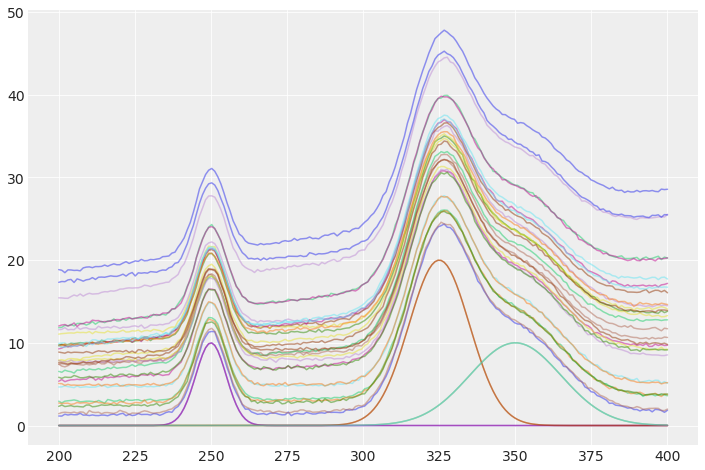

In [2]:
# number of wavelengths (x-values)
size = 200

# number of observations
obs = 30

# noise value
_epsilon = .1

# number of basis peaks (components)
npeaks = 3

# parameter values (class A)
_mu_a = [250, 325, 350]
_sigma_a = [5, 10, 15]
_amp_a = [10, 20, 10]

# parameter values (class B)
_mu_b = [250, 325, 350]
_sigma_b = [5, 10, 15]
_amp_b = [10, 20, 10]

# labels
Yl = []

# Predictor variable
X = np.linspace(200, 400, size)

# individual peaks (class A)
Za = np.zeros((npeaks, size))
for i in range(len(Za)):
    
    Za[i,:] = np.array(_amp_a[i] * np.exp(-(X-_mu_a[i])**2/(2*_sigma_a[i]**2)))  

# individual peaks (class B)
Zb = np.zeros((npeaks, size))
for i in range(len(Zb)):
    alpha = np.random.uniform(0,0.1)
    beta = np.random.uniform(0,5)
    Zb[i,:] = np.array(_amp_b[i] * np.exp(-(X-_mu_b[i])**2/(2*_sigma_b[i]**2)))  
    
# total curve is the sum of the components
Yt = np.zeros((obs, size))
for idx in range(obs):
    # random values for alpha and beta
    alpha = np.random.uniform(0,0.05)
    beta = np.random.uniform(0,5)
    if idx % 2 == 0:
        Yt[idx,:] = Za.sum(axis=0) + np.random.randn(size)*_epsilon + alpha * X + 2*beta
        Yl.append('A')
    else:
        Yt[idx,:] = Zb.sum(axis=0) + np.random.randn(size)*_epsilon + alpha * X + beta
        Yl.append('B')

Y = np.vstack([Za, Zb, Yt])

plt.figure(figsize=(12, 8))
for idx in range(len(Y)):
    plt.plot(X, Y[idx,:], "-", alpha=0.5);

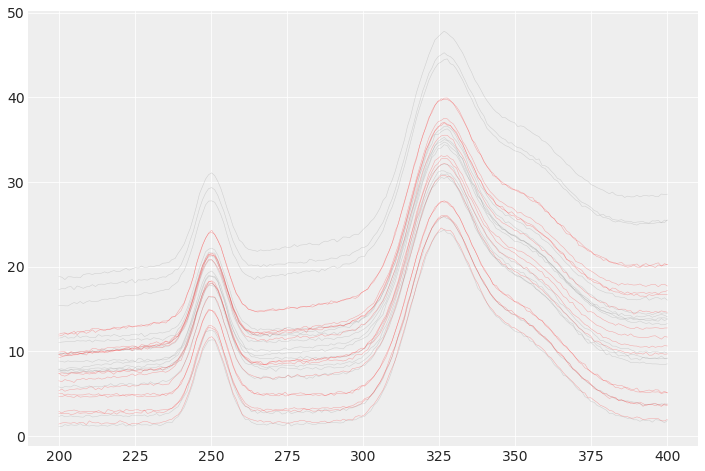

In [3]:
plt.figure(figsize=(12, 8))
for idx in range(len(Yt)):
    if Yl[idx] == "A":
        plt.plot(X, Yt[idx,:], "-", alpha=0.3, color='gray', linewidth=.5);
    else:    
        plt.plot(X, Yt[idx,:], "-", alpha=0.3, color='red', linewidth=.5);

# Convert to dataframe and save

In [4]:
# create dataframe
X = np.around(X, 1)
data = pd.DataFrame(data=Yt,columns=X)

# add label column
ll = pd.Series(Yl)
data = data.assign(label=pd.Series(ll))

# shuffle data
data = data.sample(frac=1, random_state=42)

data.head()

,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,...,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,label
27,12.038489,12.154946,12.210352,12.042005,12.151383,12.404220,11.979324,12.287811,12.315907,12.498477,...,20.149044,20.019186,20.125298,20.087293,19.905303,20.201474,20.158124,20.197530,20.268131,B
15,5.083303,5.062094,4.854623,4.981743,4.873130,4.898303,4.860817,4.862420,4.876285,4.968160,...,5.220102,5.175169,5.157144,5.238583,5.210977,5.240117,5.037431,5.148141,5.189410,B
23,1.434545,1.564450,1.608957,1.565014,1.539154,1.626390,1.503874,1.640531,1.614659,1.357547,...,1.965492,2.011286,2.071376,2.073210,2.090675,2.074384,1.824112,1.804960,1.988859,B
17,9.268249,9.371511,9.541763,9.562117,9.524657,9.654574,9.609917,9.728702,9.815753,9.915708,...,16.985647,16.849857,16.944330,16.876322,16.993820,16.752121,17.008964,17.063563,17.186636,B
8,9.663574,9.794044,9.698149,9.516028,9.688041,9.869528,9.842954,9.791033,9.615536,9.879111,...,16.304317,16.442442,16.054094,16.220330,16.354109,16.336712,16.160866,16.335488,16.052045,A


In [5]:
data.to_csv('./dummy_data_e.csv', index=False)